In [600]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

## (a)

In [601]:
#Initializing parameters
sigma1 = 1.5
sigma2 = 3.5
n = np.linspace(-7, 7, 15)

In [602]:
# #Generate the Gaussian function
# def gaussian(n, sigma):
#     return np.exp(-n**2 / (2 * sigma**2))

# #Generate Gaussians that's centered around 0
# x = np.arange(length) - center
# gaussian1 = gaussian(x, sigma1) #sd=1.5
# gaussian2 = gaussian(x, sigma2) #sd=3.5
# #Normalizing
# gaussian1 /= np.sum(gaussian1)
# gaussian2 /= np.sum(gaussian2)

In [603]:
# Create the two Gaussians
gaussian1 = np.exp(-n**2 / (2 * sigma1**2))
gaussian2 = np.exp(-n**2 / (2 * sigma2**2))

gaussian1 /= np.sum(gaussian1)
gaussian2 /= np.sum(gaussian2)

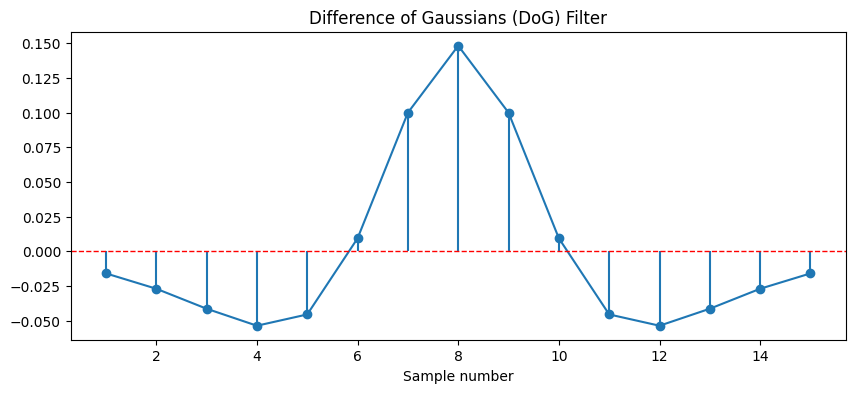

In [604]:
# Difference of Gaussians (DoG)
dog_filter = gaussian1 - gaussian2

# Plot the DoG filter
plt.figure(figsize=(10, 4))
plt.plot(n + 8, dog_filter)
plt.stem(n + 8, dog_filter, basefmt=" ")
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Sample number')
plt.title('Difference of Gaussians (DoG) Filter')
plt.show()

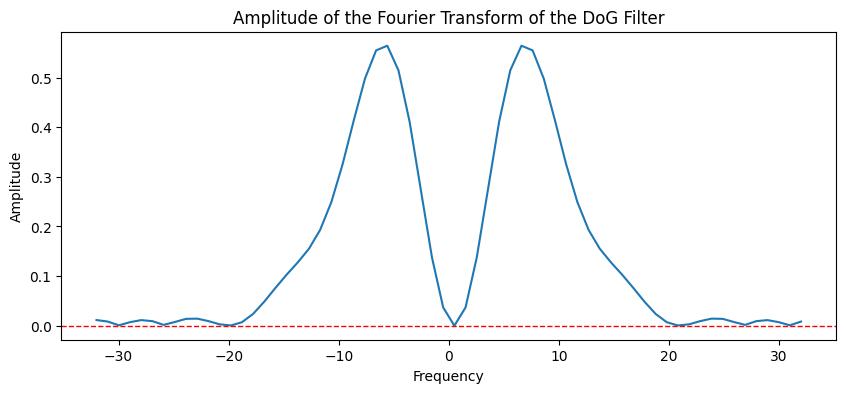

In [605]:
#Doing Fourier transform to the filter, sampled at 64 locations 
N = 64
freq_range = np.linspace(-N/2, N/2, N)

fft_dog = np.fft.fftshift(np.fft.fft(dog_filter, N))
fft_dog_amplitude = np.abs(fft_dog)

# Plot the amplitude of the Fourier transform
plt.figure(figsize=(10, 4))
plt.plot(freq_range, fft_dog_amplitude)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title("Amplitude of the Fourier Transform of the DoG Filter")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

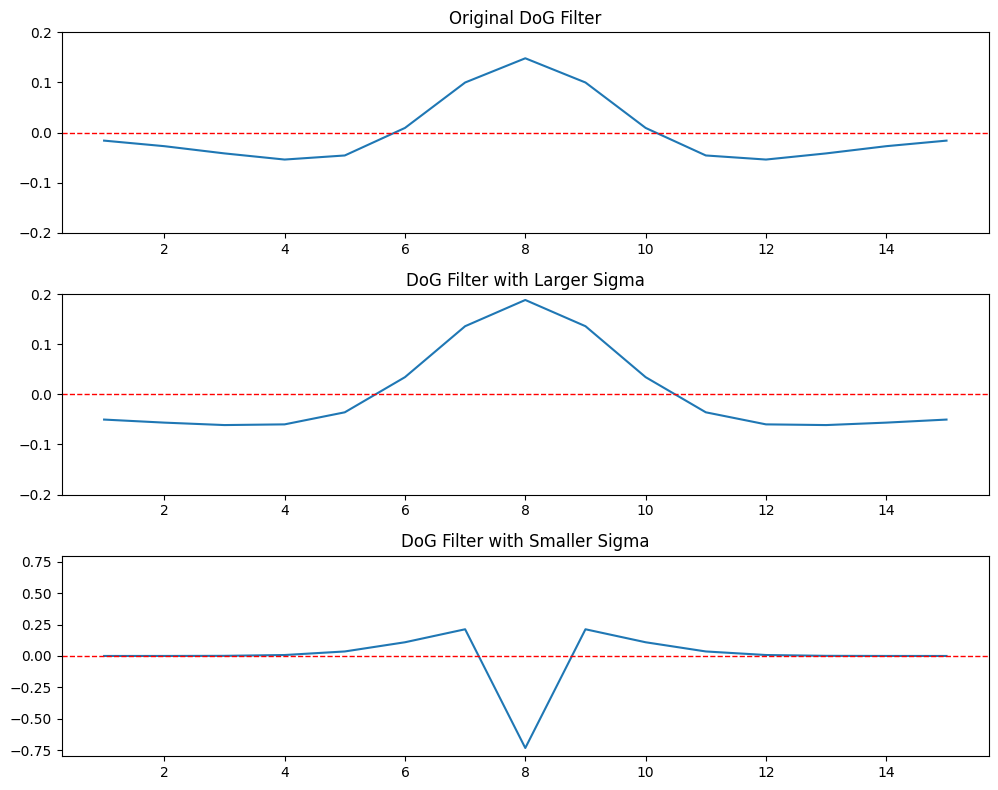

In [606]:
# Playing around 
sigma_values = [(sigma1, sigma2, 'Original DoG Filter', [-0.2, 0.2]), 
                (sigma1, 7.5, 'DoG Filter with Larger Sigma', [-0.2, 0.2]),
                (sigma1, 0.1, 'DoG Filter with Smaller Sigma', [-0.8, 0.8])]

plt.figure(figsize=(10, 8))
for i, (sigma1_val, sigma2_val, title, ylim) in enumerate(sigma_values, start=1):
    gaussian1 = np.exp(-n**2 / (2 * sigma1_val**2))
    gaussian2 = np.exp(-n**2 / (2 * sigma2_val**2))
    gaussian1 /= np.sum(gaussian1)  
    gaussian2 /= np.sum(gaussian2)  
    dog_variant = gaussian1 - gaussian2

    plt.subplot(3, 1, i)
    plt.plot(n + 8, dog_variant)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
    plt.ylim(ylim)
    plt.title(title)

plt.tight_layout()
plt.show()

The DoG filter acts as a band-pass filter. It only allow certain frequency in a specific range to pass through and prunning very low and high frequencies. 

The shape is determined by the standard deviation of the two choosen Gaussians. For the Gaussian with smaller sd, it forms a narrow, central peak; for the Gaussian with larger sd, it forms a broader shape. When we subtract them, the central peak remains as the difference, while the surrounding areas become negative, forming a characteristic center-surround structure. This structure reflects spatial contrast, similar to how retinal and LGN neurons respond to light patterns.

If change sd for smaller Gaussian: increasing it will increase the width of the central peak, making the filter more sensitive to lower frequencies, the ampliotude of the Fourier transform at lower frequencies increases, and the filter becomes broader. If decrease it, the filter will become more sensitive to higher frequencier, shifting the energy in the Fourier domain to higher frequencies. 
If change sd for bigger Gaussian: increasing it broadens the inhibitory region, and will lower the energy in mid-range frequencies, as the inhibitory part cancels out more of the excitatory peak. Where as decreasing the sd will make the inhibitory surround smaller and will increase the mid-range frequency components in the Fourier transform.

## (b)

In [607]:
#FFT of the DoG filter
N = 64

freq_range = np.linspace(0, N / 2 - 1, N // 2)
freq_range_half = freq_range / 2

fft_dog = np.fft.fftshift(np.fft.fft(dog_filter, N))
fft_dog_amplitude = np.abs(fft_dog)
fft_dog_amplitude_half = fft_dog_amplitude[N//2:]

# Maximum amplitude
max_amplitude = np.max(fft_dog_amplitude_half)
max_amplitude_index = np.argmax(fft_dog_amplitude_half)

max_frequency = freq_range[max_amplitude_index]
max_period = N / max_frequency

In [608]:
print(f"The frequency with the largest response at {max_amplitude_index} term, and  is: {max_frequency:.2f} cycles/sample")

#Period
print(f"The period of this sinusoid is: {max_period:.2f} samples")

The frequency with the largest response at 6 term, and  is: 6.00 cycles/sample
The period of this sinusoid is: 10.67 samples


In [609]:
#25% of the maximum amplitude
target_25_amplitude = max_amplitude* 0.25
threshold = np.abs(fft_dog_amplitude_half - target_25_amplitude)
closest_indices = np.argsort(threshold)[:2]
freq_25_1_index, freq_25_2_index = freq_range[closest_indices]

In [610]:
print(f"Frequencies with approximately 25% of the maximum amplitude sinusoids at frequency of {freq_25_1_index:.2f} and {freq_25_2_index:.2f} Hz.")

Frequencies with approximately 25% of the maximum amplitude sinusoids at frequency of 2.00 and 14.00 Hz.


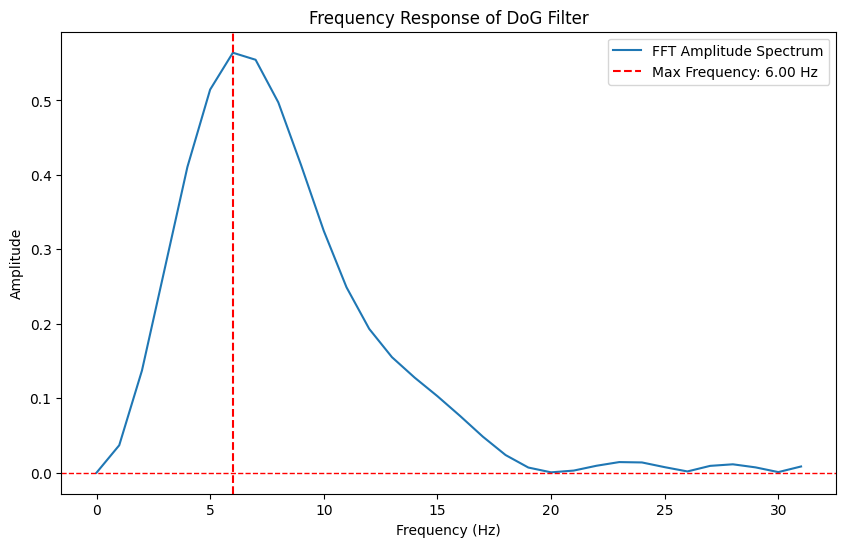

In [611]:
plt.figure(figsize=(10, 6))
plt.plot(freq_range, fft_dog_amplitude_half, label='FFT Amplitude Spectrum')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.axvline(max_frequency, color='r', linestyle='--', label=f'Max Frequency: {max_frequency:.2f} Hz')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Frequency Response of DoG Filter')
plt.show()

It's the same shape as the DoG filter.

(-1.0, 1.0)

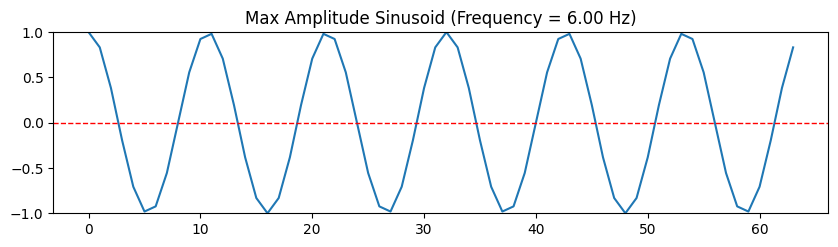

In [612]:
n = np.arange(N)
plt.figure(figsize=(10, 8))
plt.subplot(3, 1, 1)
plt.plot(np.cos(2 * np.pi * n * max_frequency / N))
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title(f'Max Amplitude Sinusoid (Frequency = {max_frequency:.2f} Hz)')
plt.ylim([-1, 1])

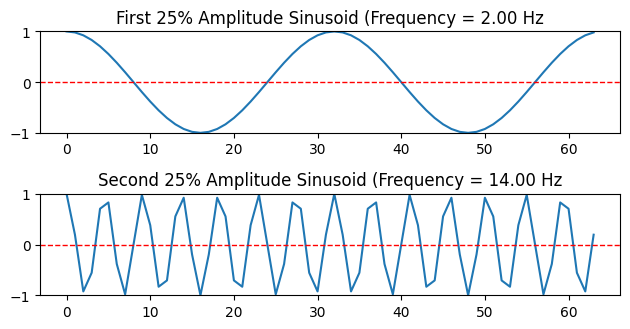

In [613]:
plt.subplot(3, 1, 2)
plt.plot(np.cos(2 * np.pi * n * freq_25_1_index / N))
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title(f'First 25% Amplitude Sinusoid (Frequency = {freq_25_1_index:.2f} Hz')
plt.ylim([-1, 1])

plt.subplot(3, 1, 3)
plt.plot(np.cos(2 * np.pi * n * freq_25_2_index / N))
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title(f'Second 25% Amplitude Sinusoid (Frequency = {freq_25_2_index:.2f} Hz')
plt.ylim([-1, 1])

plt.tight_layout()
plt.show()

## (c)

In [614]:
N_qc = 64
n_qc = np.arange(N_qc)
frequencies = [2, 6, 14] 

sinusoids = [np.cos(2 * np.pi * freq * n_qc / N_qc) for freq in frequencies]

In [615]:
#Convolution with DoG filter
responses = [np.convolve(sinusoid, dog_filter, mode='same') for sinusoid in sinusoids]

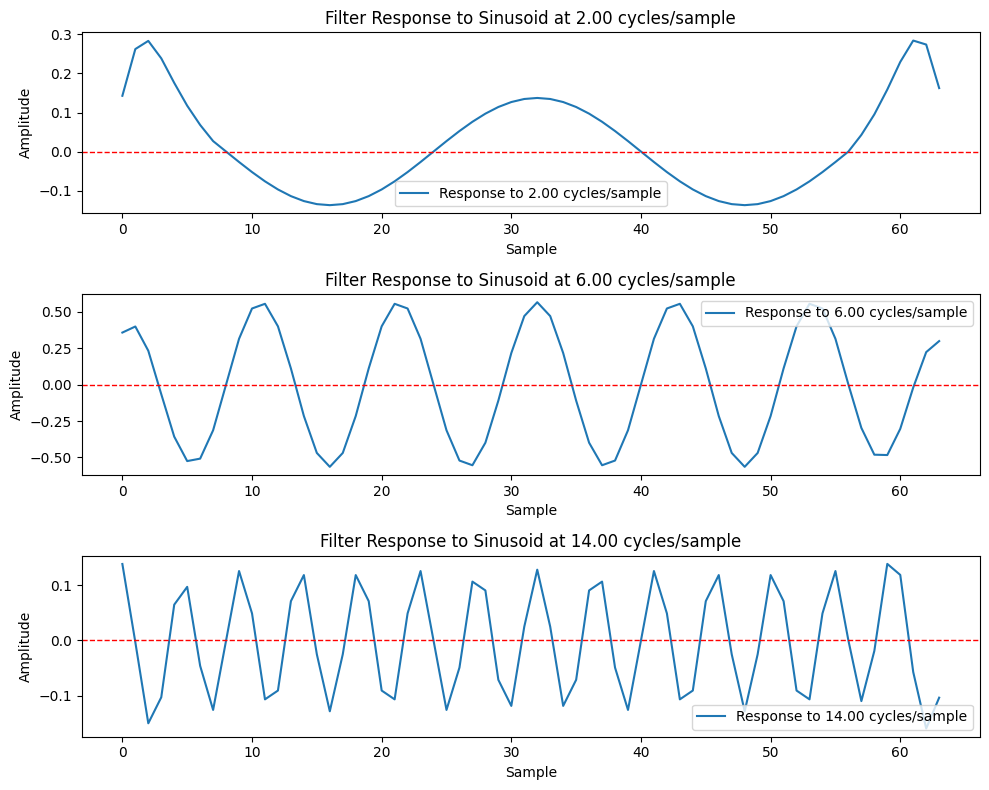

In [616]:
plt.figure(figsize=(10, 8))
for i, (sinusoid, response) in enumerate(zip(sinusoids, responses)): #enumerate(zip()) is adding index and pairing the two inputs
    plt.subplot(3, 1, i + 1)
    plt.plot(response, label=f'Response to {frequencies[i]:.2f} cycles/sample')
    plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
    plt.title(f'Filter Response to Sinusoid at {frequencies[i]:.2f} cycles/sample')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
plt.tight_layout()
plt.show()

In [617]:
amplitudes_at_max_c = []

# fourier transform to each response
for i, response in enumerate(responses):
    fft_response = np.fft.fftshift(np.fft.fft(response, N_qc))  
    fft_amplitude = np.abs(fft_response)
    amplitude_at_max_c = np.max(fft_amplitude) 
    amplitudes_at_max_c.append(amplitude_at_max_c)
    print(f'Amplitude of response at {frequencies[i]:.2f} cycles/sample: {amplitude_at_max_c:.4f}')


ratio1 = amplitudes_at_max_c[0] / amplitudes_at_max_c[1]  # low/medium
ratio2 = amplitudes_at_max_c[2] / amplitudes_at_max_c[1]  # high/medium

print(f'The ratios of the amplitudes are {ratio1:.2f} for low/medium and {ratio2:.2f} for high/medium frequencies.')
print('And these ratios are close to 25% of the amplitude in previous question.')


Amplitude of response at 2.00 cycles/sample: 5.3207
Amplitude of response at 6.00 cycles/sample: 17.3723
Amplitude of response at 14.00 cycles/sample: 4.1368
The ratios of the amplitudes are 0.31 for low/medium and 0.24 for high/medium frequencies.
And these ratios are close to 25% of the amplitude in previous question.


## (d)

In [618]:
N = 64 
n = np.arange(N)
frequencies = [2, 6, 14]

sinusoids = [np.cos(2 * np.pi * freq * n / N) for freq in frequencies]
fft_dog = np.fft.fft(dog_filter, n=N)

In [619]:
# Circular convolution
def convolve_same_length(a, b):
    if len(a) < len(b):
        a, b = b, a
    # Circularly pad `a` on both sides
    a_padded = np.concatenate([a[-(len(b) - 1):], a, a[:(len(b) - 1)]])
    c = np.zeros(len(a))
    for k in range(len(a)):
        c[k] = np.dot(a_padded[k: k + len(b)], b[::-1])
    return c

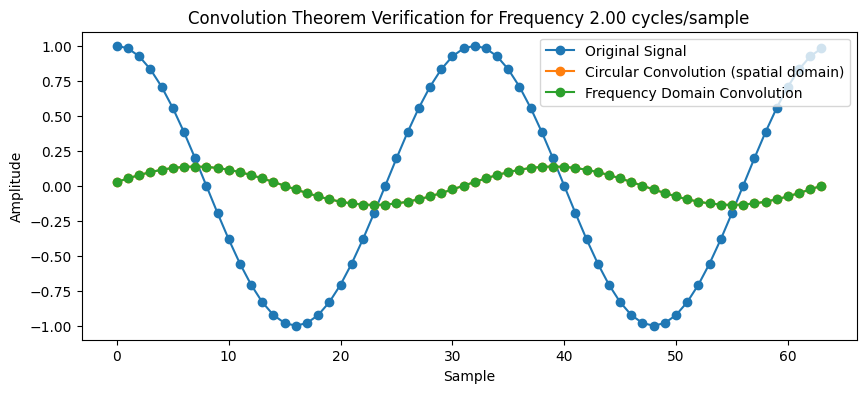

Signal 1 (Frequency 2.00 cycles/sample):
Imaginary part is zero? True
Real part matches spatial convolution? True



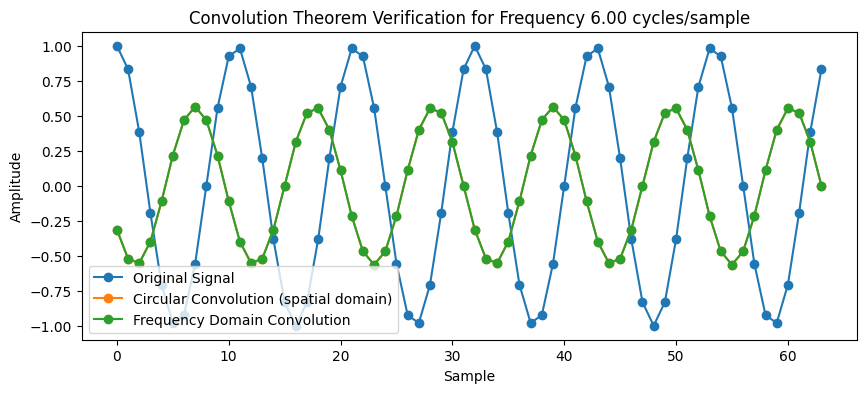

Signal 2 (Frequency 6.00 cycles/sample):
Imaginary part is zero? True
Real part matches spatial convolution? True



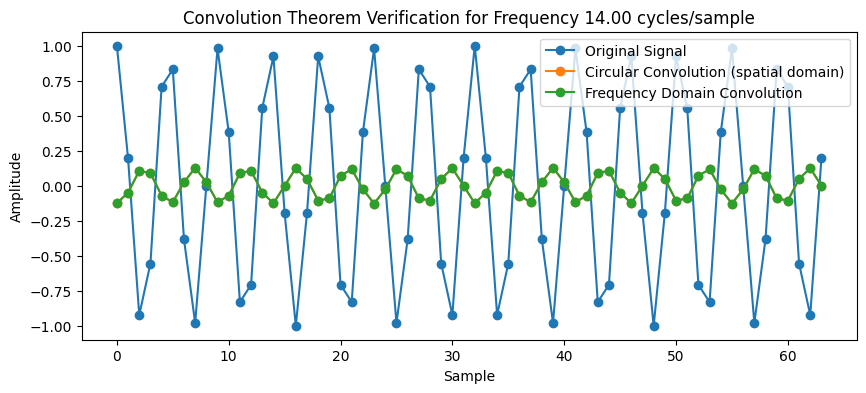

Signal 3 (Frequency 14.00 cycles/sample):
Imaginary part is zero? True
Real part matches spatial convolution? True

For the results of the inverse Fourier transform, the imaginary parts are zeros, and the real parts are the same as the results of the convolution.


In [620]:
# Verifying the convolution theorem for each sinusoidal signal
for i, sinusoid in enumerate(sinusoids):
    # Circular convolution (spatial domain)
    circular_convolution = convolve_same_length(sinusoid, dog_filter)

    # fft to sinusoidal signal
    fft_signal = np.fft.fft(sinusoid, n=N)

    # inverse fft to get into the frequency domain
    fft_product = fft_signal * fft_dog
    freq_convolution = np.fft.ifft(fft_product)

    # Verify if imaginary part is zero and if real part matches spatial convolution
    imag_check = np.allclose(freq_convolution.imag, 0, atol=1e-4)
    real_check = np.allclose(np.round(freq_convolution.real, 4), np.round(circular_convolution, 4))

    plt.figure(figsize=(10, 4))
    plt.plot(sinusoid, "-o", label="Original Signal")
    plt.plot(circular_convolution, "-o", label="Circular Convolution (spatial domain)")
    plt.plot(freq_convolution.real, "-o", label="Frequency Domain Convolution")
    plt.title(f"Convolution Theorem Verification for Frequency {frequencies[i]:.2f} cycles/sample")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

    print(f"Signal {i+1} (Frequency {frequencies[i]:.2f} cycles/sample):")
    print(f"Imaginary part is zero? {imag_check}")
    print(f"Real part matches spatial convolution? {real_check}\n")

print("For the results of the inverse Fourier transform, the imaginary parts are zeros, and the real parts are the same as the results of the convolution.")
